In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [7]:
pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
data=pd.read_csv(r"D:\TRAFFICELLIGENCE_PROJECT\traffic volume.csv")

In [9]:
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [10]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [11]:
data.shape

(48204, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [12]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [13]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [14]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [16]:
# Handling Null Values
data['holiday'].fillna('Yes', inplace=True)
data["temp"].fillna(data['temp'].mean(),inplace=True)
data["rain"].fillna(data['rain'].mean(),inplace=True)
data["snow"].fillna(data['snow'].mean(),inplace=True)
data['weather'].fillna('Clouds', inplace=True)

C:\Users\pkous\AppData\Local\Temp\ipykernel_26888\2296373696.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["temp"].fillna(data['temp'].mean(),inplace=True)
C:\Users\pkous\AppData\Local\Temp\ipykernel_26888\2296373696.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [14]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [15]:
from collections import Counter

                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000060  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  

The correlation between temp and traffic_volume is: 0.130034
The correlation between rain and snow is: -9e-05


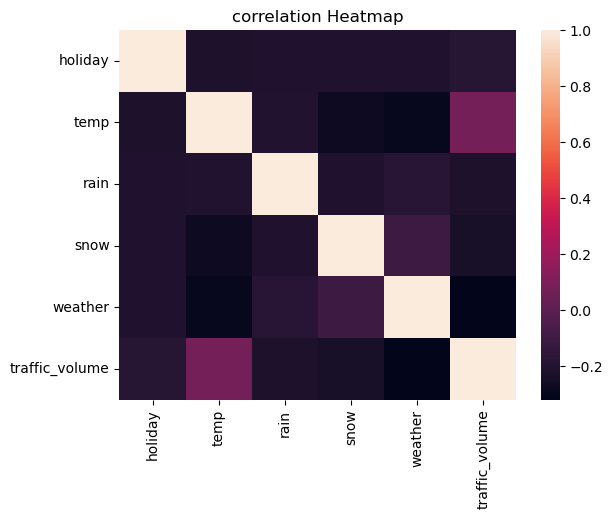

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'holiday': [1.000000, -0.000472, 0.00006, 0.000432, -0.004328, 0.018676],
    'temp': [-0.000472, 1.000000, 0.009070, -0.019758, -0.033559, 0.130034],
    'rain': [0.000066, 0.009070, 1.000000, -0.000090, 0.009542, 0.004714],
    'snow': [0.000432, -0.019758, -0.000090, 1.000000, 0.036662, 0.000735],
    'weather': [-0.004328, -0.033559, 0.009542, 0.036662, 1.000000, -0.040035],
    'traffic_volume': [0.018676, 0.130034, 0.004714, 0.000735, -0.040035, 1.000000]
}
df = pd.DataFrame(data, index=['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume'])
print(df)
print(f"\nThe correlation between temp and traffic_volume is: {df.loc['temp', 'traffic_volume']}")
print(f"The correlation between rain and snow is: {df.loc['rain', 'snow']}")
cor = df.corr()
sns.heatmap(cor)
plt.title('correlation Heatmap')
plt.show()

In [5]:
print(Counter(data["rain"]))
print(Counter(data["snow"]))

NameError: name 'Counter' is not defined

In [17]:
print(Counter(data["weather"]))

Counter({'Clouds': 15193, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, 'Smoke': 20, 'Squall': 4})


In [4]:
sns.pairplot(data)

TypeError: 'data' must be pandas DataFrame object, not: <class 'dict'>

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
data['weather']=le.fit_transform(data['weather'])

In [21]:
data['holiday']=le.fit_transform(data['holiday'])

In [23]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,11,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,11,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,11,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,11,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,11,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [24]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [25]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [26]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [27]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [28]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [29]:
name=x.columns

In [30]:
from sklearn.preprocessing import scale

In [31]:
x=scale(x)

In [32]:
x=pd.DataFrame(x,columns=name)

In [33]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [37]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [38]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

In [40]:
from sklearn import metrics

In [41]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.50151590973193
1.0
0.9747505890582587
-12.206690423423503
0.8463600277900696


In [42]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [43]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.365817964773327
0.694629717808042
0.80245411884279
-11.990577978126485
0.8047676682472229


In [44]:
MSE=metrics.mean_squared_error(p3,y_test)

In [45]:
np.sqrt(MSE)

799.5181653619187

In [46]:
import pickle

In [47]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [49]:
data.head()
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [50]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [51]:
x.shape

(48204, 11)

In [52]:
y.shape

(48204,)